In [34]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import itertools
import pickle

In [35]:
stock_a = pd.read_csv('../individual_stocks_5yr/NKE_data.csv')
stock_b = pd.read_csv('../individual_stocks_5yr/SNA_data.csv')

In [36]:
stock_a.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.285,27.595,27.240,27.295,5100734,NKE
1,2013-02-11,27.640,27.950,27.365,27.610,8916290,NKE
2,2013-02-12,27.450,27.605,27.395,27.545,3866508,NKE
3,2013-02-13,27.515,27.685,27.205,27.280,6054126,NKE
4,2013-02-14,27.285,27.495,27.160,27.310,6164026,NKE


In [37]:
stock_b.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,77.13,79.24,77.03,79.14,613825,SNA
1,2013-02-11,79.02,79.37,78.23,78.39,483219,SNA
2,2013-02-12,78.30,79.36,78.08,78.79,268378,SNA
3,2013-02-13,78.96,79.19,77.94,79.04,594479,SNA
4,2013-02-14,78.87,80.53,78.47,79.17,477036,SNA


In [38]:
stock_a.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,48.762295,49.163203,48.366458,48.778312,8.398732e+06
std,10.596713,10.700868,10.477819,10.599814,4.583604e+06
min,26.805000,27.085000,26.635000,26.745000,2.441210e+06
25%,38.752500,38.925000,38.405000,38.677500,5.882696e+06
50%,51.680000,52.050000,51.200000,51.710000,7.421781e+06
75%,56.780000,57.187500,56.385000,56.785000,9.290834e+06
max,68.200000,68.830000,67.920000,68.220000,5.731930e+07


In [39]:
stock_b.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,139.258892,140.330193,138.145915,139.289992,4.211945e+05
std,28.174312,28.378486,27.901694,28.142895,2.602688e+05
min,77.060000,77.920000,76.670000,77.060000,6.369500e+04
25%,115.760000,116.534950,114.710000,115.525000,2.613055e+05
50%,150.200000,151.310000,148.750000,150.040000,3.625490e+05
75%,161.130000,162.035000,159.740000,161.105000,4.946305e+05
max,184.460000,185.470000,183.280000,183.760000,2.289696e+06


In [40]:
stock_b.open.dtype

dtype('float64')

In [41]:
b_dates = stock_b.date.unique()
a_dates = stock_a.date.unique()

In [42]:
res = [ele for ele in b_dates if ele not in a_dates]
res

[]

In [43]:
indices = [i for i in range(len(stock_a.index)) if i %5 == 0 or i == stock_a.index[-1]]
len(indices)

253

In [44]:
change = []
dates = []
for i in range(len(indices)-1):
    opening = indices[i]
    closing = indices[i+1]
    change.append(stock_a.open.iloc[closing] - stock_a.close.iloc[opening])
for i in range(len(indices)):
    dates.append(stock_a.date.iloc[indices[i]])

In [45]:
def percent_change(stock_df):
    indices = [i for i in range(len(stock_df.index)) if i %5 == 0 or i == stock_df.index[-1]]
    change = []
    for i in range(len(indices)-1):
        opening = indices[i]
        closing = indices[i+1]
        change.append((stock_df.close.iloc[closing] - stock_df.open.iloc[opening] / stock_df.open.iloc[opening]))
    return change

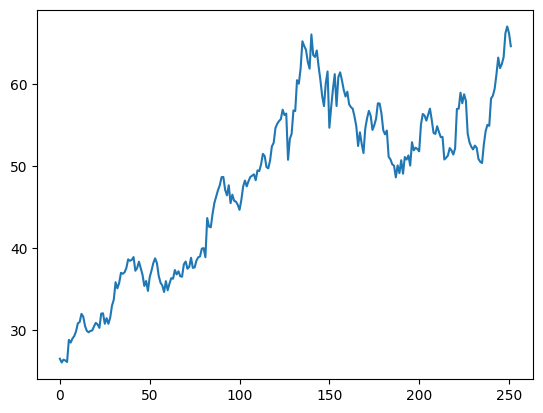

In [46]:
plt.plot(percent_change(stock_a))

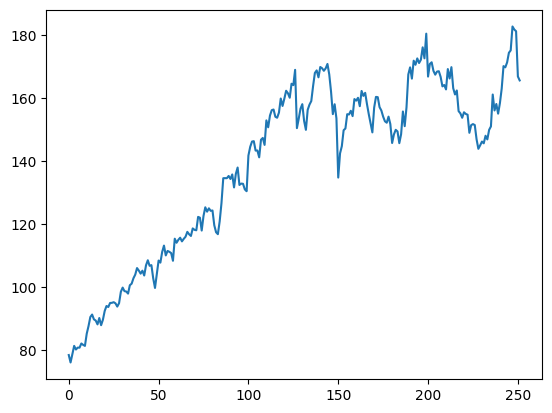

In [47]:
plt.plot(percent_change(stock_b))

In [48]:
stocks = pd.concat([stock_a, stock_b], ignore_index=True)
stocks['daily_change'] = stocks['close'] - stocks['open']
stocks.head()

,date,open,high,low,close,volume,Name,daily_change
0,2013-02-08,27.285,27.595,27.240,27.295,5100734,NKE,0.010
1,2013-02-11,27.640,27.950,27.365,27.610,8916290,NKE,-0.030
2,2013-02-12,27.450,27.605,27.395,27.545,3866508,NKE,0.095
3,2013-02-13,27.515,27.685,27.205,27.280,6054126,NKE,-0.235
4,2013-02-14,27.285,27.495,27.160,27.310,6164026,NKE,0.025


In [49]:
stock_a['daily_change'] = 100*(stock_a['close'] - stock_a['open'])/stock_a['open']
stock_b['daily_change'] = 100*(stock_b['close'] - stock_b['open'])/stock_b['open']

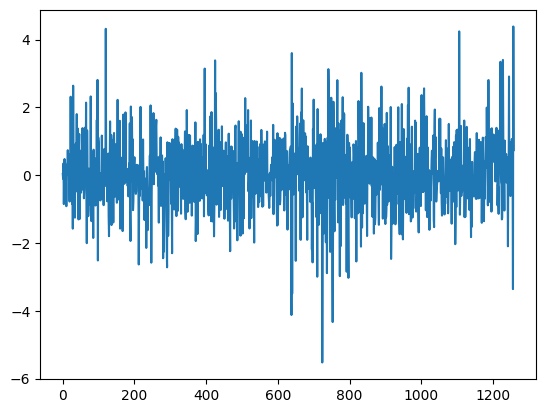

In [50]:
plt.plot(stock_a['daily_change'])

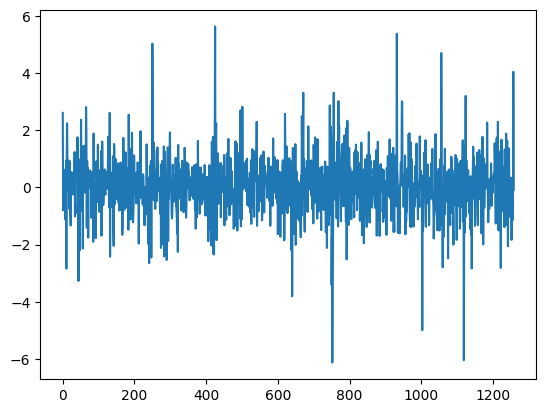

In [51]:
plt.plot(stock_b['daily_change'])

In [52]:
corr = stock_a['close'].corr(stock_b['close'])

In [53]:
corr

0.934242521368548

# Correlation here

In [54]:
def correlation(stock_a, stock_b):
    corr = stock_a['close'].corr(stock_b['close'])
    return corr

def csv_loader(filepath):
    filenames = os.listdir(filepath)
    csv_names = [filename for filename in filenames if filename.endswith('.csv')]
    csv_files = []
    for name in csv_names:
        csv_files.append(pd.read_csv(filepath+name))
    return csv_files

In [55]:

project_directory = os.path.dirname(os.path.abspath("main.py")) 
stocks_directory = os.path.dirname(os.path.abspath(project_directory)) 
stocks_directory

'/Users/thomascanro/Desktop/CLASSES/Data Structures & Algorithms/DeFAANG'

In [56]:
files = csv_loader(stocks_directory+'/individual_stocks_5yr/')

In [57]:
adj_list = {}
for i, stock1 in enumerate(files):
    adjacent_corrs = {}
    for j, stock2 in enumerate(files):
        if i == j:
            continue
        adjacent_corrs[stock2.Name.iloc[0]] = correlation(stock1, stock2)
    adj_list[stock1.Name.iloc[0]] = adjacent_corrs
    
with open('adj_list.pkl', 'wb') as file:
    pickle.dump(adj_list, file)

In [58]:
#Adjacency list for one stock
adj_list['AAL']

{'XRX': 0.008728692614539993,
 'GS': 0.6997286105055385,
 'SPGI': 0.7503390983377175,
 'MTB': 0.6601702134086779,
 'V': 0.7217944442653391,
 'CTAS': 0.7223512808613626,
 'ESRX': 0.43374747285809606,
 'APH': 0.7521252862800728,
 'BBT': 0.7101151571206041,
 'RHI': 0.7870156431144584,
 'GGP': 0.48084888997689507,
 'HCA': 0.800048665021785,
 'HD': 0.7000403060971373,
 'PEP': 0.7301711571054529,
 'INTC': 0.805385824150988,
 'MAC': 0.2910913829136342,
 'CLX': 0.6417480469399036,
 'UNP': 0.795280894219955,
 'WAT': 0.6383500264816184,
 'EMN': 0.3432599164130364,
 'ADSK': 0.6889513160944181,
 'ALK': 0.7849438510113926,
 'VZ': -0.11243496184185137,
 'AFL': 0.5470903107634872,
 'ADP': 0.7473728906305447,
 'CSRA': 0.6816637531960947,
 'AON': 0.7615163627693489,
 'APC': -0.3762485188700231,
 'WRK': 0.30696807694869516,
 'XYL': 0.6419547870581842,
 'OMC': 0.6262748371507494,
 'SLB': -0.10450262222370069,
 'NOV': -0.5243604035179753,
 'CMA': 0.6124131829625282,
 'INFO': 0.5177907761819782,
 'CRM': 0.

In [59]:
#correlation of one stock to another
adj_list['AAL']['AAPL']

0.8351143006202055

# Standard Dev, latest value by name

In [60]:
features = pd.DataFrame(columns = ['Name', 'StandDev', 'LastClosingVal'])
for stock in files:
    std_dev = stock.close.std()
    name = stock.Name.iloc[0]
    lastVal = stock.close.iloc[-1]
    dict = {'Name' : name,'StandDev':std_dev, 'LastClosingVal' : lastVal}
    ser = pd.Series(dict)
    new_row_df = pd.DataFrame(ser).transpose()
    features = pd.concat([features, new_row_df], ignore_index=True)

In [61]:
features.head()

,Name,StandDev,LastClosingVal
0,XRX,7.949466,31.18
1,GS,31.859654,257.1
2,SPGI,31.714175,182.69
3,MTB,20.536369,184.97
4,V,19.985805,119.65


In [62]:
features.to_csv('../clean_data/stocks_clean.csv')